In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plot


In [ ]:
ind = 1300
images = []
time = []

while ind <13201:
    images.append('image_'+str(ind)+'.jpg')
    time.append(str(ind))
    ind+=100
    
pressures = [1061.44000000000,1058.76000000000,1062.01000000000,1062.08000000000,1058.58000000000,1062.54000000000,1064.89000000000,1059.70000000000,
1060.85000000000,1057.01000000000,1059.88000000000,1057.96000000000,1064.14000000000,1063.77000000000,1063.74000000000,
1061.83000000000,1054.92000000000,1059.25000000000,1054.05000000000,1050.23000000000,1059.78000000000,1059.30000000000,
1059.78000000000,1060.16000000000,1057.05000000000,1060.55000000000,1057.92000000000,1059.76000000000,1060.18000000000,
1058.96000000000,1057.60000000000,1059.09000000000,1058.23000000000,1056.96000000000,1056.78000000000,1056.67000000000,
1055.48000000000,1057.07000000000,1054.89000000000,1054.28000000000,1056.70000000000,1055.69000000000,1056.72000000000,
1055.57000000000,1055.80000000000,1057.19000000000,1052.36000000000,1055.79000000000,1055.47000000000,1053.90000000000,
1054.33000000000,1055.54000000000,1055.55000000000,1051.52000000000,1055.66000000000,1055.18000000000,1055.39000000000,
1049.98000000000,1055.24000000000,1053.50000000000,1055.71000000000,1053.21000000000,1055.15000000000,1053.86000000000,
1055.01000000000,1054.93000000000,1054.12000000000,1049.68000000000,1053.06000000000,1052.29000000000,1053.64000000000,
1047.52000000000,1052.79000000000,1050.17000000000,1045.27000000000,1057.01000000000,1053.28000000000,1046.92000000000,
1049.29000000000,1051.08000000000,1050.74000000000,1048.93000000000,1048.72000000000,1052.44000000000,1050.76000000000,
1050.67000000000,1048.30000000000,1049.97000000000,1052.09000000000,1051.64000000000,1049.22000000000,1048.79000000000,
1051.29000000000,1050.32000000000,1048.70000000000,1047.26000000000,1049.76000000000,1048.82000000000,1046.03000000000,
1047.82000000000,1052.66000000000,1049.86000000000,1049.32000000000,1050.05000000000,1048.98000000000,1050.62000000000,
1051.09000000000,1048.73000000000,1048.26000000000,1049.64000000000,1048.88000000000,1048.31000000000,1050.33000000000,
1050.01000000000,1048.50000000000,1048.76000000000,1047.98000000000,1048.60000000000,1056.58000000000,1051.55]

In [ ]:
maxes = []

for image in images:
    xmax = 2000
    img = cv2.imread(image,1)
    height, width = img.shape[:2]

    alpha = 2.6
    beta = 1.8

    nimg = np.zeros(img.shape, img.dtype)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                nimg[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)


    hsv = cv2.cvtColor(nimg, cv2.COLOR_BGR2HSV)

    lower = np.array([0,0,100])
    upper = np.array([365,10,255])

    mask = cv2.inRange(hsv, lower, upper)

    kernel = np.ones((5,5),np.uint8)

    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        a = w*h
        if a>100 and a<4000:
            if x>250 and x<400:
                if y>0:
                    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                    if y<xmax:
                        xmax = y
    
    maxes.append(xmax)


cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(maxes)


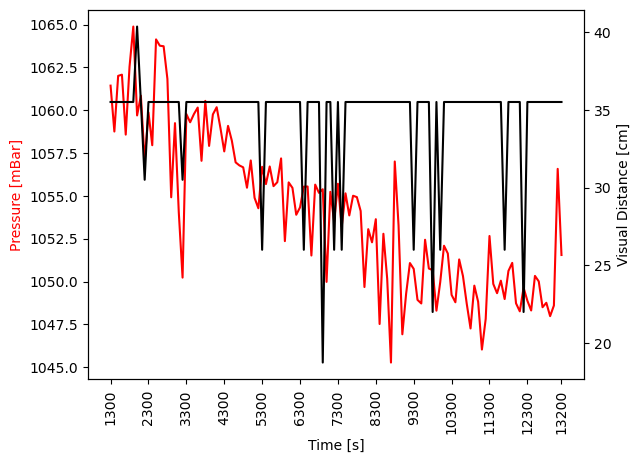

In [174]:
mean_xmax = np.mean(maxes)
mean_pressure = np.mean(pressures)

dist = []
balls = []
dist2 = []

for max in maxes:
    if max>0 and max<20:
        balls.append(0)
        dist.append(40.35)
    if max>20 and max<40:
        balls.append(1)
        dist.append(35.5)
    if max>40 and max<55:
        balls.append(2)
        dist.append(30.5)
    if max>55 and max<80:
        balls.append(3)
        dist.append(26)
    if max>80 and max<100:
        balls.append(6)
        dist.append(22)
    if max>100:
        balls.append(5)
        dist.append(18.75)

numer = 0
denom = 0
for i in range(len(maxes)):
    numer += (pressures[i] - mean_pressure) * (maxes[i] - mean_xmax)
    denom += (pressures[i] - mean_pressure) ** 2
m = numer / denom
c = mean_xmax - (m * mean_pressure)

p = np.linspace(np.min(pressures),np.max(pressures),100)
llsr = m*p + c

for n in dist:
    dist2.append(n*10)



#plot.scatter(pressures,dist,label= 'Data')
#plot.plot(p,llsr,label='LLSR Regression')
#plot.legend()
#plot.xlabel('Pressure [mBar]')
#plot.ylabel('Furthest Ball Identified [cm]')
#plot.show()

fig, p1 = plot.subplots() 
  
p1.set_xlabel('Time [s]')
p1.set_ylabel('Pressure [mBar]', color = 'red') 
p1.plot(time, pressures, color = 'red')
p1.tick_params(axis = 'x', rotation = 90)
plot.xticks([0,10,20,30,40,50,60,70,80,90,100,110,119])

p2 = p1.twinx() 
p2.set_ylabel('Visual Distance [cm]', color = 'black') 
p2.plot(time, dist, color = 'black') 

plot.show()
 


In [ ]:
images[1]

In [ ]:

images[2]


In [ ]:
np.mean(pressures)



In [ ]:
len(time2)
#len(time)
#len(pressures)
